In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [4]:
data.shape

(2318, 11)

In [5]:
data.isna().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [6]:
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [ ]:
# Observations:
1. Data sets ocnsists of 2318 samples with 10 features.
2. No missing NaNs in the datasets. No need to handle the missing values.
3. 6 variables have categorical string. Need to convert into numbers using encoding technique.
4. id can be removed.
5. mean and std deviation seems fine for continuous data.

In [ ]:
# ENCODING THE CATEGORICAL STRING INTO INTEGERS

In [7]:
data.model.nunique()

258

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
Ordinal_encoder_model = OrdinalEncoder(categories=[data.model.unique()])
Ordinal_encoded_model = Ordinal_encoder_model.fit_transform(data[['model']])
Ordinal_encoded_model

array([[  0.],
       [  0.],
       [  1.],
       ...,
       [101.],
       [256.],
       [257.]])

In [10]:
data.model = Ordinal_encoded_model

In [11]:
data.mark.nunique()

28

In [12]:
data.mark.unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

In [13]:
Ordinal_encoder_mark = OrdinalEncoder(categories=[data.mark.unique()])
Ordinal_encoded_mark = Ordinal_encoder_mark.fit_transform(data[['mark']])
Ordinal_encoded_mark

array([[0.],
       [0.],
       [0.],
       ...,
       [6.],
       [5.],
       [1.]])

In [14]:
data.mark = Ordinal_encoded_mark

In [15]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,0.0,0.0,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,0.0,0.0,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,0.0,1.0,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,1.0,2.0,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,2.0,3.0,2006,66300,660,at,2wd,rhd,gasoline


In [16]:
data.transmission.unique()

array(['at', 'mt', 'cvt'], dtype=object)

In [17]:
Ordinal_encoder_transmission = OrdinalEncoder(categories=[data.transmission.unique()])
Ordinal_encoded_transmission = Ordinal_encoder_transmission.fit_transform(data[['transmission']])
data.transmission = Ordinal_encoded_transmission

In [18]:
data.drive.unique()

array(['2wd', '4wd', 'awd'], dtype=object)

In [19]:
Ordinal_encoder_drive = OrdinalEncoder(categories=[data.drive.unique()])
Ordinal_encoded_drive = Ordinal_encoder_drive.fit_transform(data[['drive']])
data.drive = Ordinal_encoded_drive

In [20]:
data.hand_drive.unique()

array(['rhd', 'center', 'lhd'], dtype=object)

In [21]:
Ordinal_encoder_hand_drive = OrdinalEncoder(categories=[data.hand_drive.unique()])
Ordinal_encoded_hand_drive = Ordinal_encoder_hand_drive.fit_transform(data[['hand_drive']])
data.hand_drive = Ordinal_encoded_hand_drive

In [22]:
data.fuel.unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [23]:
Ordinal_encoder_fuel = OrdinalEncoder(categories=[data.fuel.unique()])
Ordinal_encoded_fuel = Ordinal_encoder_fuel.fit_transform(data[['fuel']])
data.fuel = Ordinal_encoded_fuel

In [24]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,0.0,0.0,2003,80000,1240,0.0,0.0,0.0,0.0
1,1,110,0.0,0.0,2010,53000,1200,0.0,0.0,0.0,0.0
2,2,165,0.0,1.0,2005,47690,2000,0.0,0.0,0.0,0.0
3,3,190,1.0,2.0,2008,130661,1990,0.0,0.0,0.0,0.0
4,4,190,2.0,3.0,2006,66300,660,0.0,0.0,0.0,0.0


In [25]:
# dropping the id column is it has no relation
data = data.drop('id',axis =1)

In [26]:
data.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,0.0,0.0,2003,80000,1240,0.0,0.0,0.0,0.0
1,110,0.0,0.0,2010,53000,1200,0.0,0.0,0.0,0.0
2,165,0.0,1.0,2005,47690,2000,0.0,0.0,0.0,0.0
3,190,1.0,2.0,2008,130661,1990,0.0,0.0,0.0,0.0
4,190,2.0,3.0,2006,66300,660,0.0,0.0,0.0,0.0


In [27]:
data.describe()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,3.018119,66.314927,2005.972390,100013.194996,1507.010785,0.076359,0.087144,0.014236,0.020276
std,288.673112,3.549468,57.569579,3.698863,52512.478883,549.585170,0.310571,0.289655,0.166885,0.211910
min,80.000000,0.000000,0.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,1.000000,22.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,1.000000,48.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,0.000000,0.000000
75%,1213.000000,5.000000,107.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,0.000000,0.000000
max,1400.000000,27.000000,257.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


In [28]:
# EDA

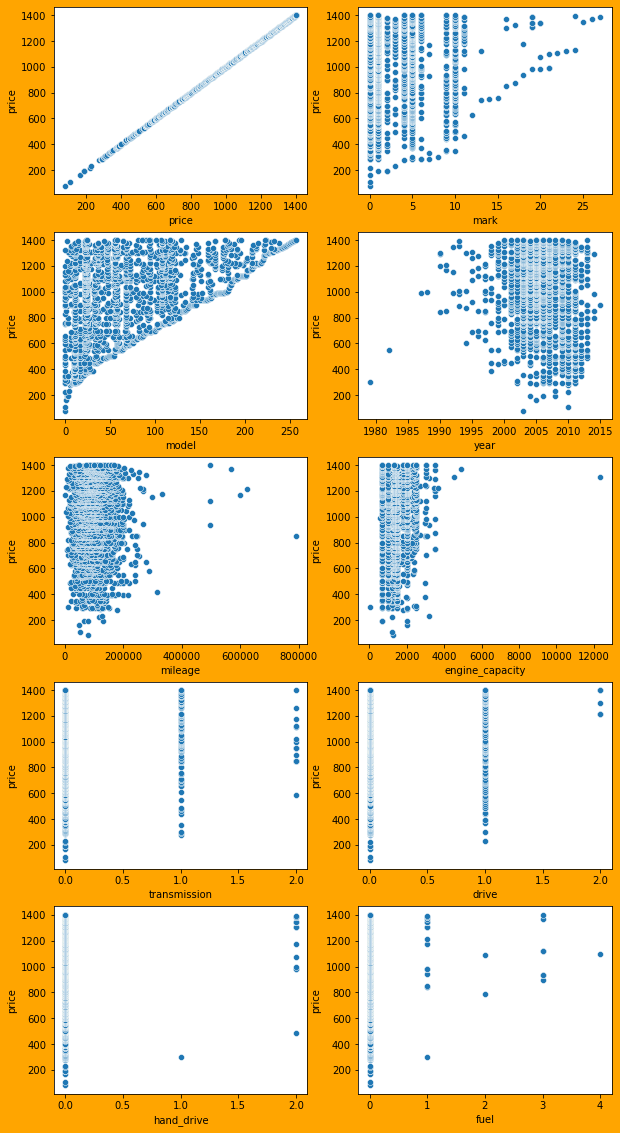

In [29]:
import seaborn as sns
plt.figure(figsize=(10,20),facecolor='orange',)
plotnumber = 1


for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.scatterplot(data[column],data['price'])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

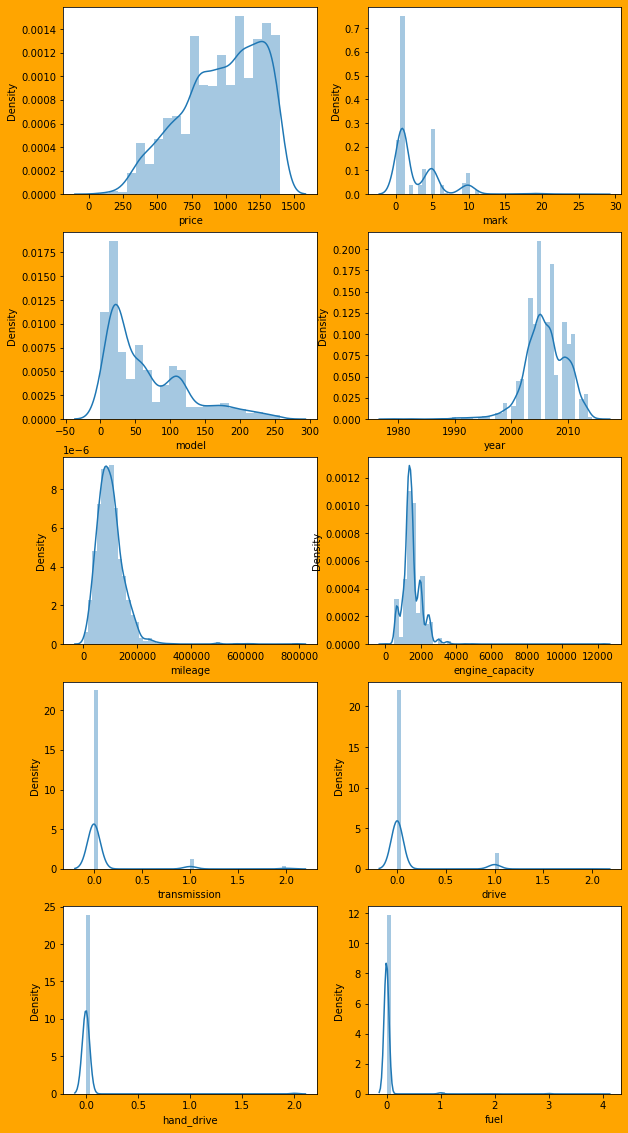

In [30]:
plt.figure(figsize=(10,20),facecolor='orange',)
plotnumber = 1


for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

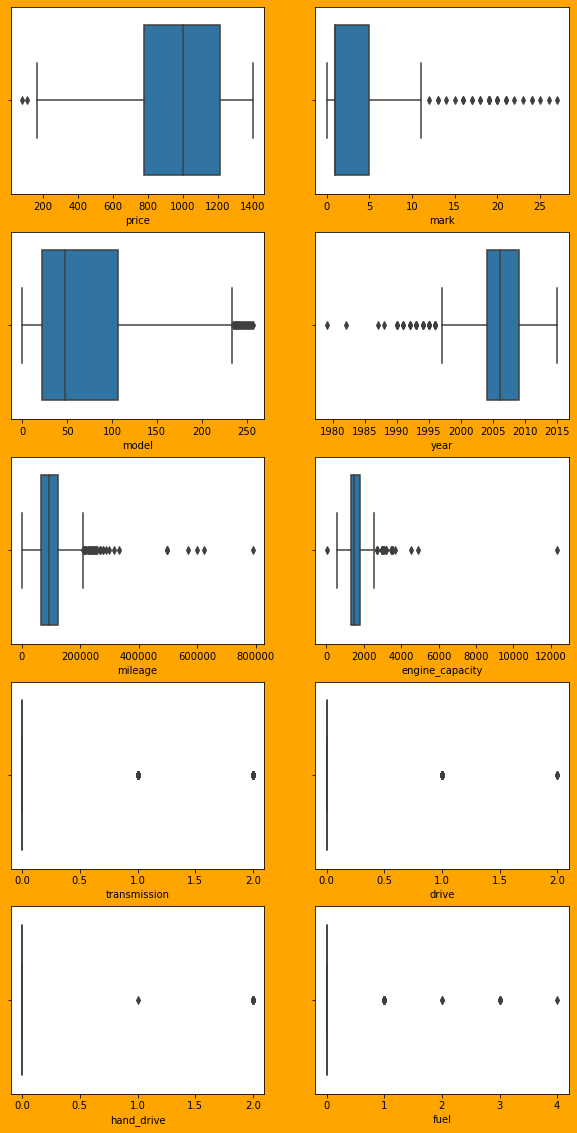

In [31]:
plt.figure(figsize=(10,20),facecolor='orange')
plotnumber = 1


for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [ ]:
#EDA Observations:
1. 'year','mileage','engine_capacity' have skewness. Outliers need to be treated.

In [32]:
from scipy.stats import zscore
import numpy as np
z_score =zscore(data[['year','mileage','engine_capacity']])
scaled_z_score = np.abs(z_score)
filtering_entry =(scaled_z_score <3).all(axis=1)
data = data[filtering_entry]

In [33]:
data.shape

(2263, 10)

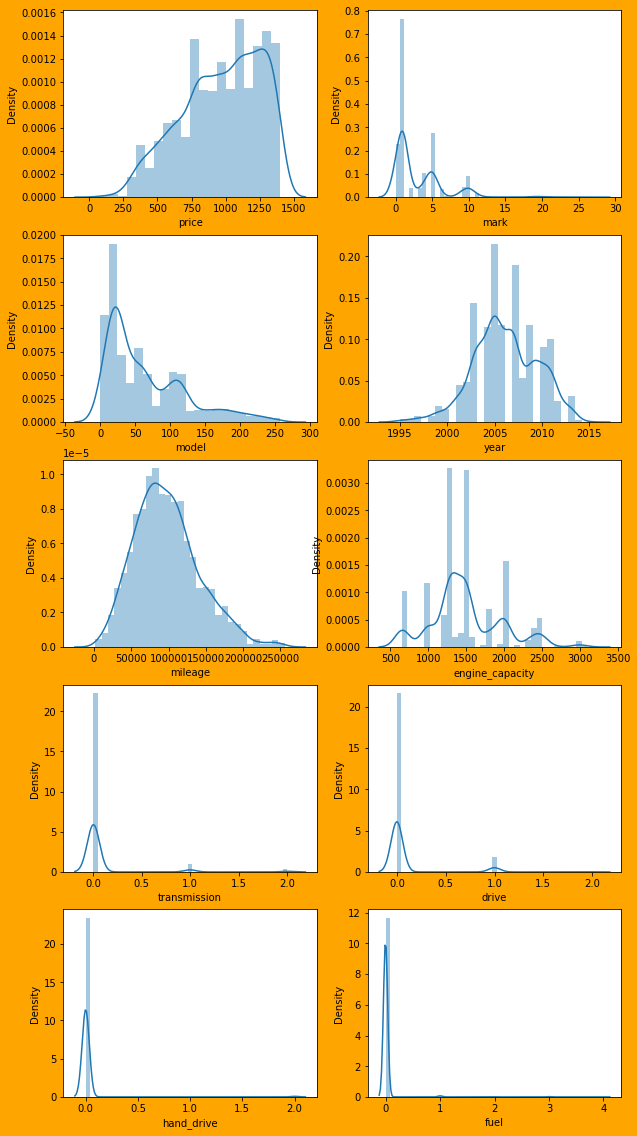

In [34]:
plt.figure(figsize=(10,20),facecolor='orange',)
plotnumber = 1


for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

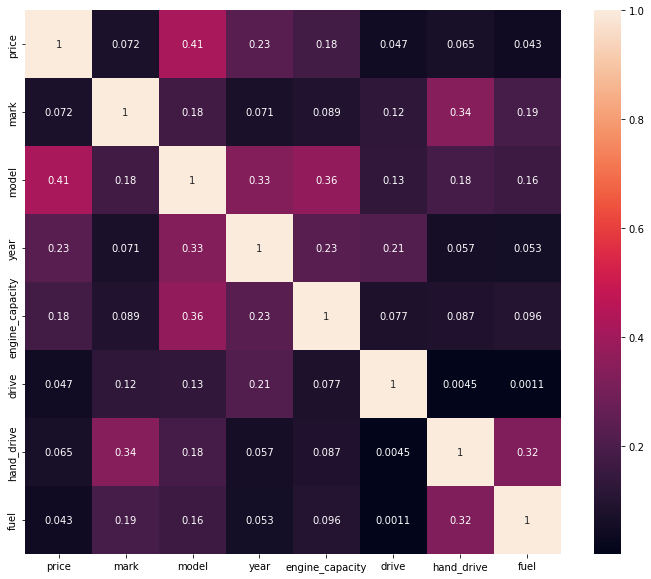

In [64]:
df_corr = data.corr().abs()  

plt.figure(figsize =(12, 10))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :10})
plt.show()

In [36]:
# dropping tranmission and mileage as it has least relation with price
data= data.drop(columns = ['transmission', 'mileage'])

In [37]:
x = data.drop(columns = ['price'])
y = data.price

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [39]:
x_scaled.shape

(2263, 7)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.213968,mark
1,1.325910,model
2,1.181753,year
3,1.218540,engine_capacity
4,1.069515,drive
5,1.248405,hand_drive
6,1.139845,fuel


In [41]:
# no multicollinearity as there is no vif value greater than 5.

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.8,random_state = 355)

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [44]:
predicted_price_linear = lm.predict(x_test)

In [57]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,roc_curve, roc_auc_score,classification_report
r2_score(y_test,predicted_price_linear)

0.15362110345975666

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [47]:
predicted_price_logistic = log.predict(x_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted_price_logistic)

-0.4353711853120166

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_price_logistic))

              precision    recall  f1-score   support

         190       0.00      0.00      0.00         1
         290       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         1
         313       0.00      0.00      0.00         1
         330       0.00      0.00      0.00         1
         336       0.00      0.00      0.00         1
         340       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         4
         355       0.00      0.00      0.00         1
         375       0.00      0.00      0.00         1
         390       0.04      0.50      0.07         2
         400       0.00      0.00      0.00         1
         401       0.00      0.00      0.00         2
         448       0.00      0.00      0.00         1
         450       0.00      0.00      0.00         5
         465       0.00      0.00      0.00         1
         467       0.00      0.00      0.00         2
         480       0.00    

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
predicted_price_dt = dt.predict(x_test)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted_price_dt)

-0.2795164992695547

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_price_dt))

              precision    recall  f1-score   support

          80       0.00      0.00      0.00         0
         190       0.00      0.00      0.00         1
         283       0.00      0.00      0.00         0
         290       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         1
         313       0.00      0.00      0.00         1
         330       0.00      0.00      0.00         1
         336       0.00      0.00      0.00         1
         340       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         4
         355       0.00      0.00      0.00         1
         375       0.00      0.00      0.00         1
         390       0.00      0.00      0.00         2
         398       0.00      0.00      0.00         0
         400       0.00      0.00      0.00         1
         401       0.00      0.00      0.00         2
         428       0.00      0.00      0.00         0
         440       0.00    

In [68]:
def metric_score (dt,x_train, y_train, x_test, y_test, train=True):
    if train:
        y_pred = dt.predict (x_train)
        print("\n----------------Train Result----------------")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")

    elif train ==False:
        y_pred_test = dt.predict (x_test)
        print("\n----------------Test Result----------------")
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test)*100:.2f}%")

        print("\n Test Classification Report -\n", classification_report(y_test, y_pred_test, digits = 2))

In [58]:
metric_score(dt,x_train,y_train,x_test,y_test, train = True)
metric_score(dt,x_train,y_train,x_test,y_test, train = False)


----------------Train Result----------------
Accuracy Score: 54.59%

----------------Test Result----------------
Accuracy Score: 8.17%

 Test Classification Report -               precision    recall  f1-score   support

          80       0.00      0.00      0.00         0
         190       0.00      0.00      0.00         1
         283       0.00      0.00      0.00         0
         290       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         1
         313       0.00      0.00      0.00         1
         330       0.00      0.00      0.00         1
         336       0.00      0.00      0.00         1
         340       0.00      0.00      0.00         1
         350       0.00      0.00      0.00         4
         355       0.00      0.00      0.00         1
         375       0.00      0.00      0.00         1
         390       0.00      0.00      0.00         2
         398       0.00      0.00      0.00         0
         400       0.0

In [59]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
metric_score(random,x_train,x_test,y_train,y_test,train=True)
metric_score(random,x_train,x_test,y_train,y_test,train=False)


----------------Train Result----------------


ValueError: Found input variables with inconsistent numbers of samples: [453, 1810]

In [61]:
predicted_price_random = random.predict(x_test)

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted_price_random)

-0.2125667671448086

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier() 
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


----------------Train Result----------------


ValueError: Found input variables with inconsistent numbers of samples: [453, 1810]

In [71]:
# as linear regression gives good accuracy, i select linear regression as the model algorithm.
#i made some mistake with other algorithm and please share the wrong i did

In [ ]:
# please gude me to handle this further...